# ***Project Title:*** Sleep Disorder Risk Prediction Using Machine Learning

**Project Description:** This project uses a supervised ML classification model(Random Forest Classifier) to predict whether a person is likely to have a sleep disorder such as insomnia or sleep apnea. It analyzes lifestyle and health-related features like stress level, sleep duration, physical activity level, and BMI Category. The model was trained using scikit-learn library.

***Loading Libraries:***

✅ Load essential Python libraries for data analysis.

📊 matplotlib and seaborn used for visualization.

🔍 Sets up tools for later exploration and plotting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Loading the Dataset:***

📥 Loads the dataset into a DataFrame.

🔎 Shows sample records for understanding structure.

📊 Checks distribution of target variable.

In [2]:
df = pd.read_csv("sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Insomnia
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Insomnia
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Insomnia
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
print(df.shape)
print(df.columns)
print(df.index)

(1359, 13)
Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')
RangeIndex(start=0, stop=1359, step=1)


In [5]:
df["Gender"].value_counts()

Gender
Male      697
Female    662
Name: count, dtype: int64

***Analysis of the Datastet:***

ℹ️ info() command is used to Displays data types and missing values.

📈 describe() command Summarizes numeric stats: mean, std, quartiles

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                1359 non-null   int64  
 1   Gender                   1359 non-null   object 
 2   Age                      1359 non-null   int64  
 3   Occupation               1359 non-null   object 
 4   Sleep Duration           1359 non-null   float64
 5   Quality of Sleep         1359 non-null   int64  
 6   Physical Activity Level  1359 non-null   int64  
 7   Stress Level             1359 non-null   int64  
 8   BMI Category             1359 non-null   object 
 9   Blood Pressure           1359 non-null   object 
 10  Heart Rate               1359 non-null   int64  
 11  Daily Steps              1359 non-null   int64  
 12  Sleep Disorder           1359 non-null   object 
dtypes: float64(1), int64(7), object(5)
memory usage: 138.2+ KB


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,680.000000,41.802060,7.099117,7.253127,59.321560,5.428992,70.372333,6852.388521
std,392.453819,9.098372,0.917663,1.372174,21.275881,2.123384,5.067555,1954.652412
min,1.000000,23.000000,4.800000,3.000000,20.000000,1.000000,60.000000,1148.000000
25%,340.500000,35.000000,6.400000,6.000000,42.000000,4.000000,67.000000,5502.000000
50%,680.000000,41.000000,7.100000,7.000000,60.000000,5.000000,70.000000,6931.000000
75%,1019.500000,49.000000,7.800000,8.000000,76.000000,7.000000,73.000000,8000.000000
max,1359.000000,64.000000,9.400000,10.000000,100.000000,10.000000,90.000000,11953.000000


***Data Cleaning:***

- isnull() command is used to return True if a Null value exist otherwise False.
- sum() method is used to compute total number of null values in each column of the dataset.
- duplicated() method is used to find the number of duplicate records in a dataset.

In [7]:
df.isnull().sum()  # column wise 

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [8]:
df.duplicated().sum() # row wise

np.int64(0)

***Kernal Density Estimation(KDE) PLOT:***
- Kernel Density plot is used to identify the association between two or more variables.
- In our dataset "physical activity level" and "Stress level" are the variables considered for KDE plot.
- The plot shows there is no overlapping in between those 2 variables.
- **syntax:** "sns.kdeplot()"

<Axes: ylabel='Density'>

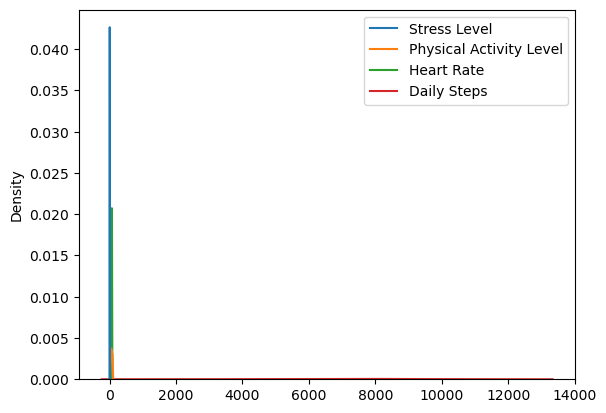

In [9]:
sns.kdeplot(df[["Stress Level", "Physical Activity Level", "Heart Rate", "Daily Steps"]], legend=True)

***Data Transformation:***
- **LabelEncoder:**
  * converts the Categorical variables like we converted "gender" variable which contains male and female into 1 and 0.
  * label encoder is imported from preprocessing class of the scikit learn Library.
- **Standard Scaler:**
  * Transforms the numerical features by removing the mean and bring to unit variance
  * mean=0 and variance=1
  * It is used to bring overlapping or association among the variables.

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  

scaler = StandardScaler()
df[['Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']] = scaler.fit_transform(df[['Physical Activity Level', 'Stress Level', 'Heart Rate','Daily Steps']])

<Axes: ylabel='Density'>

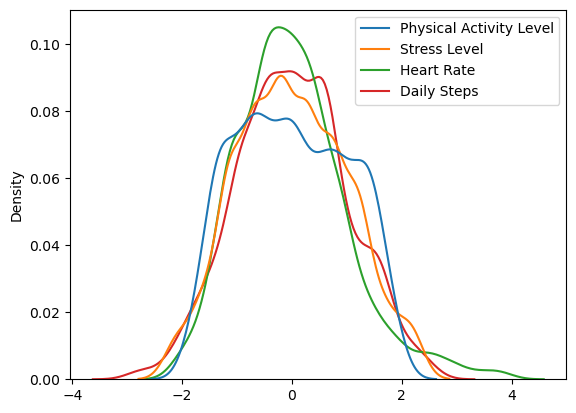

In [11]:
sns.kdeplot([df["Physical Activity Level"],df["Stress Level"], df["Heart Rate"], df["Daily Steps"]],legend=True)

In [12]:
# checking for mean and variance after scaling
print("Mean of Physical Activity level After Scaling:",int(df["Physical Activity Level"].mean()))
print("Mean of Stress level after Scaling:",int(df["Stress Level"].mean()))
print("Mean of Heart Rate After Scaling:",int(df["Heart Rate"].mean()))
print("Variance of Physical Activity level After Scaling:",int(df["Physical Activity Level"].var()))
print("Variance of Stress level after Scaling:",int(df["Stress Level"].var()))
print("Variance of Heart Rate after Scaling:",int(df["Heart Rate"].var()))

Mean of Physical Activity level After Scaling: 0
Mean of Stress level after Scaling: 0
Mean of Heart Rate After Scaling: 0
Variance of Physical Activity level After Scaling: 1
Variance of Stress level after Scaling: 1
Variance of Heart Rate after Scaling: 1


***Data Visulaization:***
- **Count Plot:**
  * countplot (from Seaborn) shows the number of occurrences (counts) of each category in a categorical variable as bars.
  * The height of each bar directly shows the value, making it a simple and effective way to visualize differences.
  * You can modify orientation (horizontal/vertical), colors, labels, and add grouping to compare multiple categories side-by-side.
  * **syntax:** "sns.countplot()"

Text(0.5, 1.0, 'Sleep Disorder Distribution')

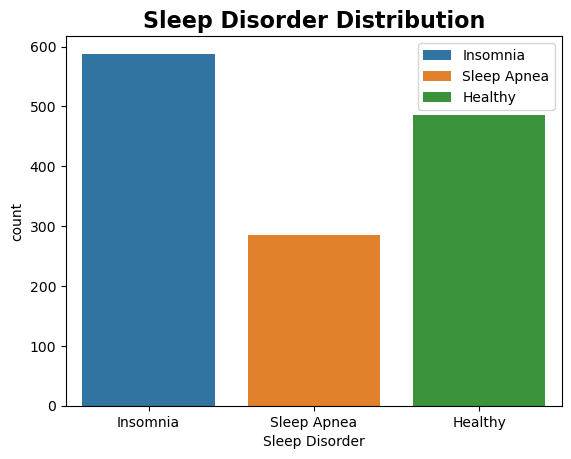

In [16]:
sns.countplot(x='Sleep Disorder',hue="Sleep Disorder", data=df, legend=True)
plt.legend()
plt.title("Sleep Disorder Distribution", fontweight='bold', fontsize=16)

In [14]:
df["Sleep Disorder"].value_counts()

Sleep Disorder
Insomnia       588
Healthy        486
Sleep Apnea    285
Name: count, dtype: int64

***Pie Chart:***
* A pie chart displays data as slices of a circle, where each slice represents a category's proportion relative to the whole.
* It's ideal for showing the percentage or part-to-whole relationships in categorical data, like survey results or market share.
* **syntax:** "plt.pie()"

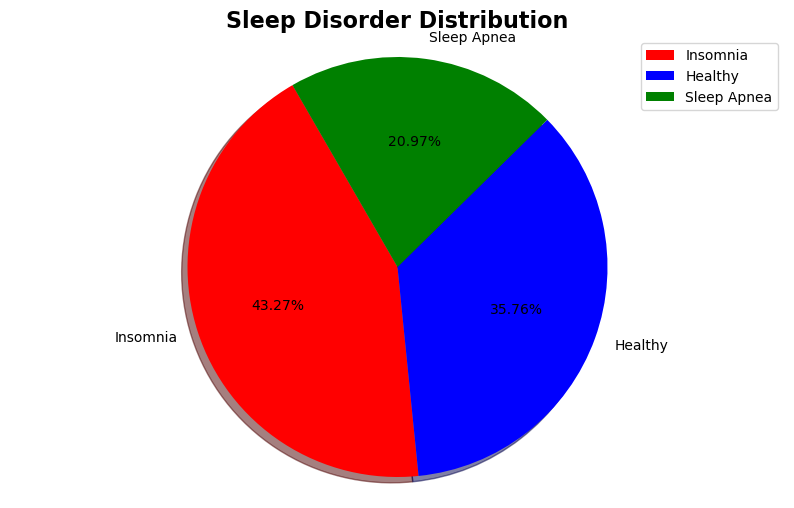

In [18]:
disorder_counts = df['Sleep Disorder'].value_counts()
labels = disorder_counts.index
sizes = disorder_counts.values
colors = ['red','blue','green']

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, startangle=120, autopct='%2.2f%%', shadow=True, colors=colors)
plt.legend()
plt.title('Sleep Disorder Distribution', fontsize=16, fontweight='bold')
plt.axis('equal') 
plt.show()

***Scatter Plot:***
   - Scatter plots are used to visualize the relationship between two continuous numerical variables.
   - Helps identify trends, clusters, and potential outliers — useful for understanding linear/non-linear correlations.
   - **syntax:** "sns.scatterplot()"

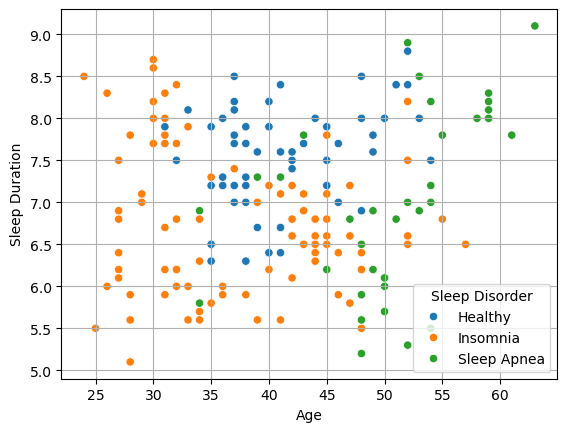

In [20]:
np.random.seed(42)
sample_data=df.sample(n=200, random_state=42)
sns.scatterplot(x='Age', y='Sleep Duration', hue='Sleep Disorder',  data=sample_data)
plt.grid(True)

***Histogram:***
   - Histograms display the frequency distribution of a single continuous numeric variable by dividing it into bins (ranges).
   - Useful for understanding how values are spread, whether data is normally distributed, skewed, or has multiple peaks.

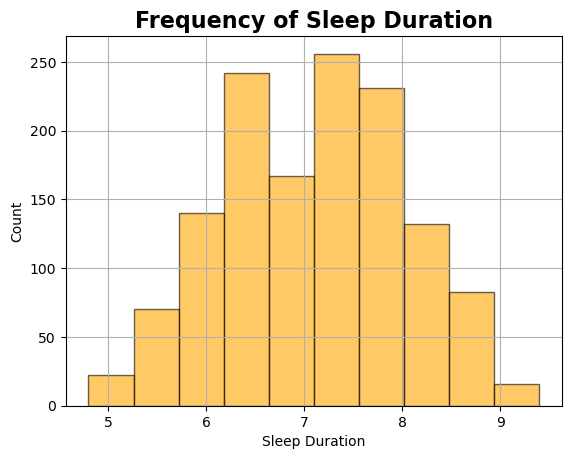

In [21]:
plt.hist(df['Sleep Duration'], color='orange', edgecolor='black', alpha=0.6)
plt.title("Frequency of Sleep Duration", fontsize=16, fontweight='bold')
plt.xlabel("Sleep Duration")
plt.ylabel("Count")
plt.grid(True)
plt.show()

***Line Chart:***
* A line chart is used to display how a value changes over time or across ordered categories (like age groups, days, or months).
* It plots individual data points and connects them with a continuous line, making it easy to spot increases, decreases, or patterns.

C:\Users\subrahmanyam\AppData\Local\Temp\ipykernel_14940\2050207267.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sleep_by_age = df.groupby('Age Group')['Sleep Duration'].mean().reset_index()


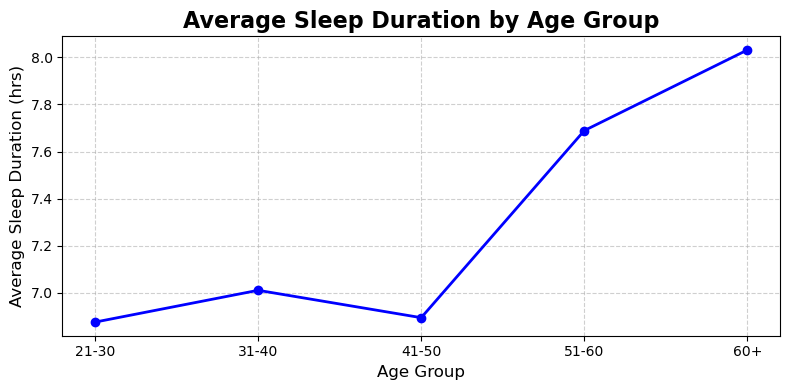

In [24]:
# Create age bins
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], 
                         labels=['<20', '21-30', '31-40', '41-50', '51-60', '60+'])

# Calculate mean sleep duration per age group
avg_sleep_by_age = df.groupby('Age Group')['Sleep Duration'].mean().reset_index()

# Plot Line Chart
plt.figure(figsize=(8, 4))
plt.plot(avg_sleep_by_age['Age Group'], avg_sleep_by_age['Sleep Duration'], 
         marker='o', linestyle='-', color='b', linewidth=2)

plt.title('Average Sleep Duration by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Sleep Duration (hrs)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

***Exploratory Data Analysis(EDA):***

**1.Correlation:**
* Correlation is defined as the strength of association between numeric variables.
* It lies in between -1 to 1
* negative values indicate negative correlation and positive values indicate positive correlation.

**Heatmap:**
- A heatmap uses colors to represent the magnitude of values in a matrix, making it easy to identify patterns, correlations, or anomalies.
- In data analysis, heatmaps are often used to show the correlation between numerical features, helping to quickly spot strong or weak relationships.

Text(0.5, 1.0, 'CorrelationHeatmap')

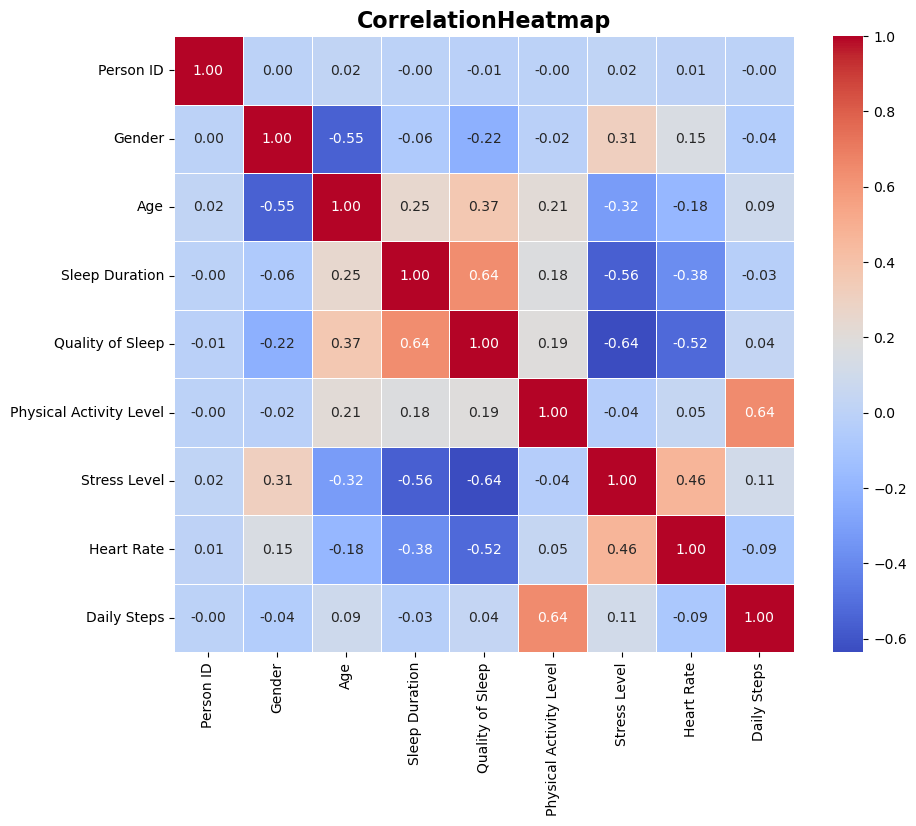

In [25]:
plt.figure(figsize=(10, 8))               
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("CorrelationHeatmap", fontsize=16, fontweight="bold")

***2.Outlier Detection:***
   - An **outlier** is a data point that lies outside the expected range of a dataset.

***Box Plot:***
   - A boxplot (or box-and-whisker plot) visually summarizes the distribution of a dataset and highlights outliers.
   - **Box:** Represents the Interquartile Range(IQR)
        * Q1 (25th percentile)
        * Q2 (Median or 50th percentile)
        * Q3 (75th percentile)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Software Engineer'),
  Text(1, 0, 'Doctor'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Teacher'),
  Text(4, 0, 'Nurse'),
  Text(5, 0, 'Engineer'),
  Text(6, 0, 'Accountant'),
  Text(7, 0, 'Scientist'),
  Text(8, 0, 'Lawyer'),
  Text(9, 0, 'Salesperson'),
  Text(10, 0, 'Manager')])

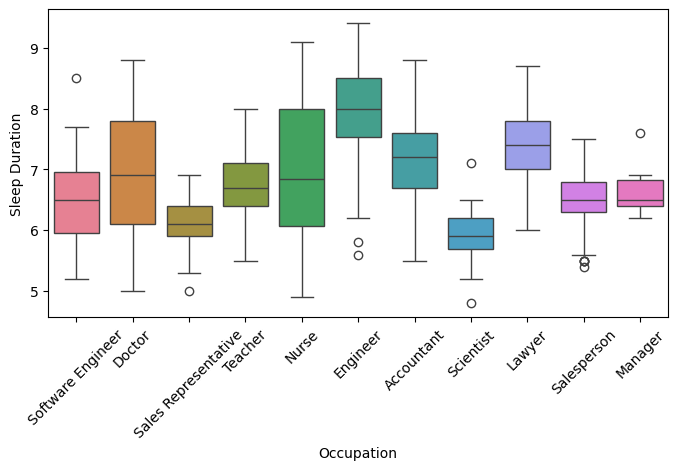

In [26]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Occupation', y='Sleep Duration', hue="Occupation", data=df)
plt.xticks(rotation=45)

***Outlier removal using IQR Method:***

**step-1:**
* IQR Identifies Outliers Based on Spread.
* IQR=Q3-Q1
    
**step-2:**
* Outliers Lie Outside the IQR Boundaries.
* Define Lower and Upper bounds
* Lower Bound=Q1−1.5*IQR
* Upper bound=Q3+1.5*IQR
     
**step-3:**
 * Once identified, outliers can be removed by filtering the dataset.
 * This keeps only the data within the acceptable range, improving model stability and performance.

In [27]:
def remove_outliers_groupwise(df, group_col, target_col):
    cleaned_df = pd.DataFrame()

    for group in df[group_col].unique():
        group_df = df[df[group_col] == group]

        Q1 = group_df[target_col].quantile(0.25)
        Q3 = group_df[target_col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter within this group
        filtered_group = group_df[(group_df[target_col] >= lower_bound) & (group_df[target_col] <= upper_bound)]
        cleaned_df = pd.concat([cleaned_df, filtered_group], axis=0)

    return cleaned_df

# Apply on your data
df = remove_outliers_groupwise(df, 'Occupation', 'Sleep Duration')

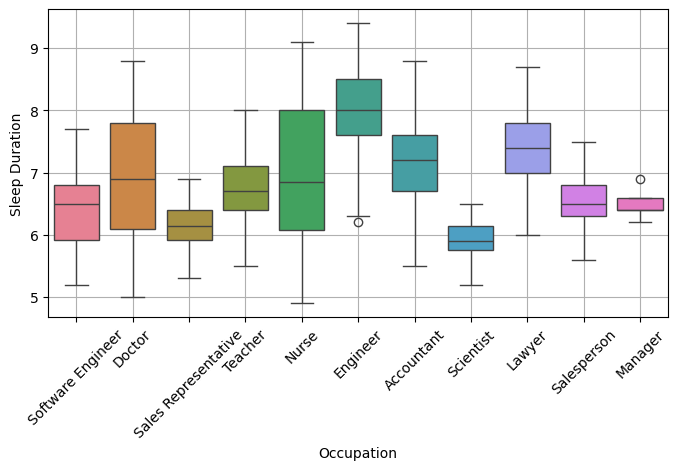

In [28]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Occupation', y='Sleep Duration', hue="Occupation", data=df)
plt.xticks(rotation=45)
plt.grid()

***Basic Statistical Analysis:*** Basic Statistical Analysis refers to the process of summarizing, exploring, and interpreting data using foundational statistical techniques. It involves calculating key metrics to understand the central tendency, variability, and distribution of data.

✅ Grouped data by Occupation to analyze how job roles influence sleep and health parameters.

📈 Calculated mean values of Sleep Duration, Stress Level, and Heart Rate for each occupation to identify lifestyle patterns.

🔍 Rounded the results to two decimal places for easier interpretation and reporting.

📋 Reset the index to convert grouped data back into a clean DataFrame format, ready for visualization or export.

In [29]:
res=df.groupby('Occupation')[['Sleep Duration', 'Stress Level', 'Heart Rate']].mean().round(2)
res=res.reset_index()
res

,Occupation,Sleep Duration,Stress Level,Heart Rate
0,Accountant,7.19,-0.40,-0.29
1,Doctor,6.96,0.64,0.25
2,Engineer,7.98,-0.74,-0.63
3,Lawyer,7.39,-0.18,-0.15
4,Manager,6.50,-0.01,1.19
5,Nurse,6.96,0.11,0.32
6,Sales Representative,6.18,1.64,2.83
7,Salesperson,6.53,0.68,0.31
8,Scientist,5.89,0.68,1.48
9,Software Engineer,6.49,0.32,1.26


***Machine Learning:***
- Machine Learning is the subset of AI that enables the machines to learn from the data automatically without any mannual intervention.

***Random Forest Classifier:***
The Random Forest Classifier is an ensemble machine learning algorithm that builds multiple decision trees and combines their outputs to make more accurate and stable predictions. It's part of the bagging family of algorithms.Since our target column is of classification type so random forest uses the concept of *Majority Voting*.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Encode target column 'Sleep Disorder'
target_le = LabelEncoder()
df['Sleep Disorder'] = target_le.fit_transform(df['Sleep Disorder'])

X = df.drop(['Sleep Disorder'], axis=1)
y = df['Sleep Disorder']
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)

***Model Evaluation Metrics:***
1. Classification Report
2. Confusion Matrix

**Classification Report:**  The classification report is a key evaluation tool in machine learning for classification models, and it summarizes how well your model is performing across all classes.

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        83
           1       0.98      0.94      0.96       132
           2       0.91      0.89      0.90        55

    accuracy                           0.94       270
   macro avg       0.93      0.94      0.93       270
weighted avg       0.94      0.94      0.94       270



**Confusion Matrix:**
A confusion matrix is a table that compares the model's predicted labels with the true labels to show how well the classifier performed.

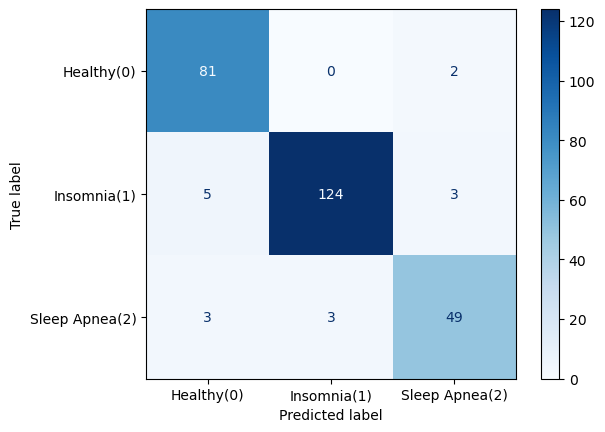

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy(0)','Insomnia(1)','Sleep Apnea(2)'])
disp.plot(cmap='Blues')

In [41]:
healthy_label = target_le.fit_transform(['Healthy','Insomnia','Sleep Apnea'])[0]

risk_tags = []
for prob, pred in zip(pred_proba, y_pred):
    confidence = prob[list(model.classes_).index(pred)]
    
    if pred == healthy_label:
        risk_tags.append("🟢 No Risk")
    elif confidence > 0.8:
        risk_tags.append("🔴 High Risk")
    elif confidence > 0.5:
        risk_tags.append("🟡 Moderate Risk")
    else:
        risk_tags.append("🔵 Low Risk")

risk_df = X_test.copy()
risk_df['Predicted Disorder'] = target_le.inverse_transform(y_pred)
risk_df['Risk Level'] = risk_tags
risk_df=risk_df.reset_index()

print(risk_df[['Predicted Disorder', 'Risk Level']].head(10))

  Predicted Disorder       Risk Level
0           Insomnia      🔴 High Risk
1        Sleep Apnea      🔴 High Risk
2            Healthy        🟢 No Risk
3           Insomnia      🔴 High Risk
4           Insomnia      🔴 High Risk
5        Sleep Apnea      🔴 High Risk
6        Sleep Apnea  🟡 Moderate Risk
7        Sleep Apnea      🔴 High Risk
8           Insomnia      🔴 High Risk
9            Healthy        🟢 No Risk


In [42]:
risk_df['Risk Level'].value_counts()

Risk Level
🔴 High Risk        152
🟢 No Risk           89
🟡 Moderate Risk     27
🔵 Low Risk           2
Name: count, dtype: int64